# Store Sale Prediction Training 

This notebook pertains to the actual preparation model and training using Tensorflow 2.x

Author: Arian Yambao

Date: November 1, 2021

In [25]:
# Import the necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Run this block when running on colab
!mkdir dataset
!cp /content/drive/MyDrive/mynt/train_modified.csv /content/dataset

In [9]:
# Load the dataset
dataset = pd.DataFrame(pd.read_csv("dataset/train_modified.csv"))#.fillna(0)
dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Day
0,1,4,6228,650,1,1,0,0,4,30
1,2,4,6884,716,1,1,0,0,4,30
2,3,4,9971,979,1,1,0,0,4,30
3,4,4,16106,1854,1,1,0,0,4,30
4,5,4,6598,729,1,1,0,0,4,30
...,...,...,...,...,...,...,...,...,...,...
914624,1111,2,0,0,0,0,1,1,1,1
914625,1112,2,0,0,0,0,1,1,1,1
914626,1113,2,0,0,0,0,1,1,1,1
914627,1114,2,0,0,0,0,1,1,1,1


In [10]:
# Prepare the Xs and Ys
x = dataset.drop(["Sales"], axis=1).values
y = dataset["Sales"].values

In [11]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [12]:
# Reshape to (batch_size, timesteps, input_dim)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

In [16]:
# Initialize the model
model = tf.keras.Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1:] )))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 100, batch_size = 256)

Epoch 1/100
2859/2859 [==============================] - 36s 10ms/step - loss: 47133956.0000
Epoch 2/100
2859/2859 [==============================] - 30s 10ms/step - loss: 45867232.0000
Epoch 3/100
2859/2859 [==============================] - 30s 10ms/step - loss: 44633188.0000
Epoch 4/100
2859/2859 [==============================] - 30s 10ms/step - loss: 43419504.0000
Epoch 5/100
2859/2859 [==============================] - 30s 10ms/step - loss: 42228508.0000
Epoch 6/100
2859/2859 [==============================] - 30s 10ms/step - loss: 41056572.0000
Epoch 7/100
2859/2859 [==============================] - 30s 10ms/step - loss: 39905872.0000
Epoch 8/100
2859/2859 [==============================] - 30s 10ms/step - loss: 38775036.0000
Epoch 9/100
2859/2859 [==============================] - 30s 10ms/step - loss: 37665104.0000
Epoch 10/100
2859/2859 [==============================] - 30s 11ms/step - loss: 36576796.0000
Epoch 11/100
2859/2859 [==============================] - 29s 10ms/st

In [19]:
# Reshape test to (batch_size, timesteps, input_dim)
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [21]:
predictions = model.predict(x_test)

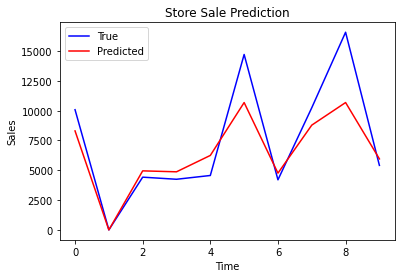

In [33]:
plt.plot(y_test[0:10], color='blue', label="True")
plt.plot(predictions[0:10], color='red', label="Predicted")
plt.title('Store Sale Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

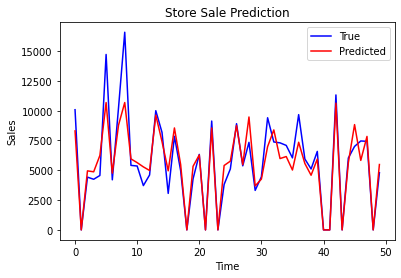

In [34]:
plt.plot(y_test[0:50], color='blue', label="True")
plt.plot(predictions[0:50], color='red', label="Predicted")
plt.title('Store Sale Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

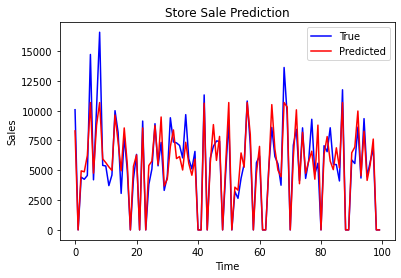

In [35]:
plt.plot(y_test[0:100], color='blue', label="True")
plt.plot(predictions[0:100], color='red', label="Predicted")
plt.title('Store Sale Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

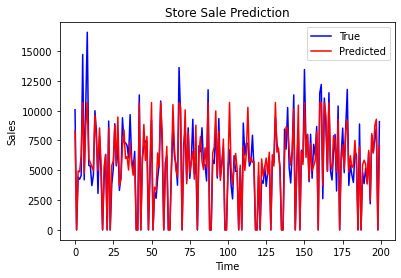

In [38]:
plt.plot(y_test[0:200], color='blue', label="True")
plt.plot(predictions[0:200], color='red', label="Predicted")
plt.title('Store Sale Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [17]:
# Save the trained model
model.save("store_sale_predictor")

INFO:tensorflow:Assets written to: store_sale_predictor/assets


INFO:tensorflow:Assets written to: store_sale_predictor/assets


In [18]:
!cp -r /content/store_sale_predictor /content/drive/MyDrive/mynt